In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
df = pd.read_csv('./data/ml_source_files/titanic_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# Preprocessing / EDA

<AxesSubplot:>

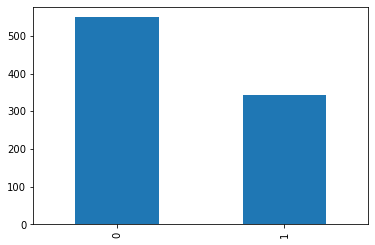

In [47]:
df.Survived.value_counts().plot(kind='bar')

C:\Users\sim\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

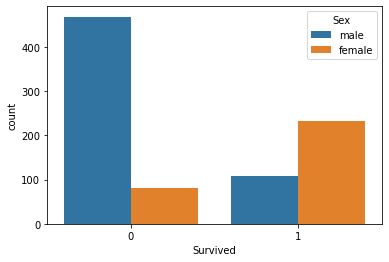

In [48]:
sns.countplot(df['Survived'], hue='Sex', data=df) #hue 안에 카테코리형태 

C:\Users\sim\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

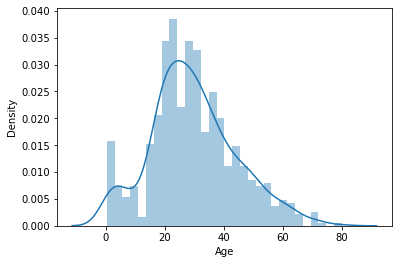

In [49]:
sns.distplot(df['Age'],bins=30) # 변수를 여러개의 bin으로 자름 

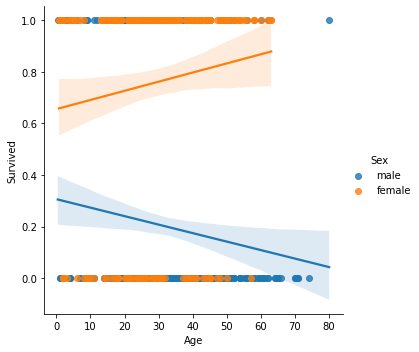

In [50]:
sns.lmplot(x='Age',y='Survived',data=df,hue='Sex') # 여자나이에따라 생존률,남자나이에따라 생존률 

In [51]:
df.isnull().sum()/len(df) #오류율 NULL값얼마나있나 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [52]:
df.drop('Cabin',axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
df['Age'] = df.Age.fillna(df.Age.mean()) #nan값을 age의 평균값으로 채워라

In [54]:
df.isnull().sum()/len(df) #오류율 NULL값얼마나있나 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [55]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum()#오류율 NULL값얼마나있나 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
# x,y split 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
y = df['Survived']    #불연속 (binary) classification 
x = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [59]:
x = pd.get_dummies(x) # objext => one_hot
x #카테고리 나뉨.. hue가틈 

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,3,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,0,0,1
4,3,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0,1,0,0,1
887,1,19.000000,0,0,1,0,0,0,1
888,3,29.699118,1,2,1,0,0,0,1
889,1,26.000000,0,0,0,1,1,0,0


In [60]:
# train_test_split

In [61]:
from sklearn.model_selection import train_test_split 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=111)

In [63]:
# LogistRegression algorithm import 

In [64]:
from sklearn.linear_model import LogisticRegression 

In [65]:
log = LogisticRegression()

In [66]:
# Algorithm train 

In [67]:
log.fit(x_train,y_train) # 쓸 알고리즘에 데이터들 fit. 

C:\Users\sim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# model predict

In [69]:
preds = log.predict(x_test) # 피쳐만가지고 예측이 어떻게나왔나 가정, 결과값은 필요x

In [70]:
preds

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [71]:
# model evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
confusion_matrix(y_test, preds) #오차행렬 
#TP(긍정예측을 성공 즉,환자라고 예측해서 실제 환자임을 맞춤) FN(부정예측을 실패 즉, 비환자라고 예측했지만 실제 확자임)
#FP(긍정예측을 실패 즉, 환자라고 예측했지만 비환자임)        TN(부정예측을 성공 즉, 비환자라고 예측하여 실제 비환자임을 맞춤)

array([[91, 13],
       [18, 56]], dtype=int64)

In [76]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.76      0.78        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178



In [77]:
# precision : 예측한 값이 잘 맞춘 비율,  True라고 예측한 값 중에서 True인 비율
# recall : 실제값을 잘 맞춘 비율, 실제 True인 데이터를 True라고 예측한 비율
# f1-score : precision과 recall을 조화평균한 값 ...